In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
import imblearn
import mlxtend
#import xgboost
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#import tensorflow as tf
#from keras.models import Sequential
#import catboost

In [4]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

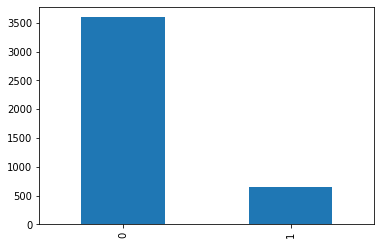

In [7]:
df['TenYearCHD'].value_counts().plot.bar()

In [8]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df=df.sample(frac=1)

In [10]:
df=df.fillna(method='ffill')

In [11]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979481,0.494104,9.015094,0.029481,0.005896,0.310613,0.025708,236.623349,132.354599,82.897759,25.799849,75.874292,81.924764,0.151887
std,0.495027,8.572942,1.019648,0.500024,11.922224,0.169171,0.076569,0.462799,0.158280,44.576256,22.033300,11.910394,4.078302,12.027805,23.550506,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.750000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.385000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


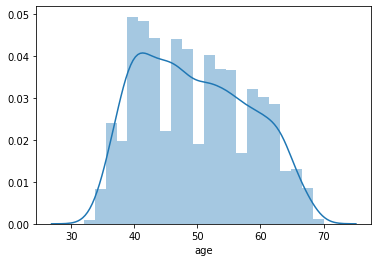

In [12]:
sns.distplot(df['age'])
plt.show()

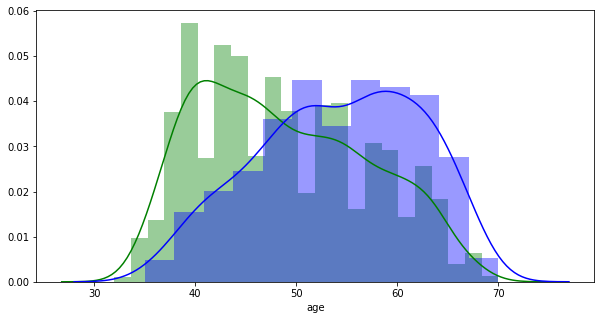

In [13]:
plt.figure(figsize=(10,5))
df0=df[df['TenYearCHD']==0]
df1=df[df['TenYearCHD']==1]
sns.distplot(df0['age'],color='g')
sns.distplot(df1['age'],color='b')
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


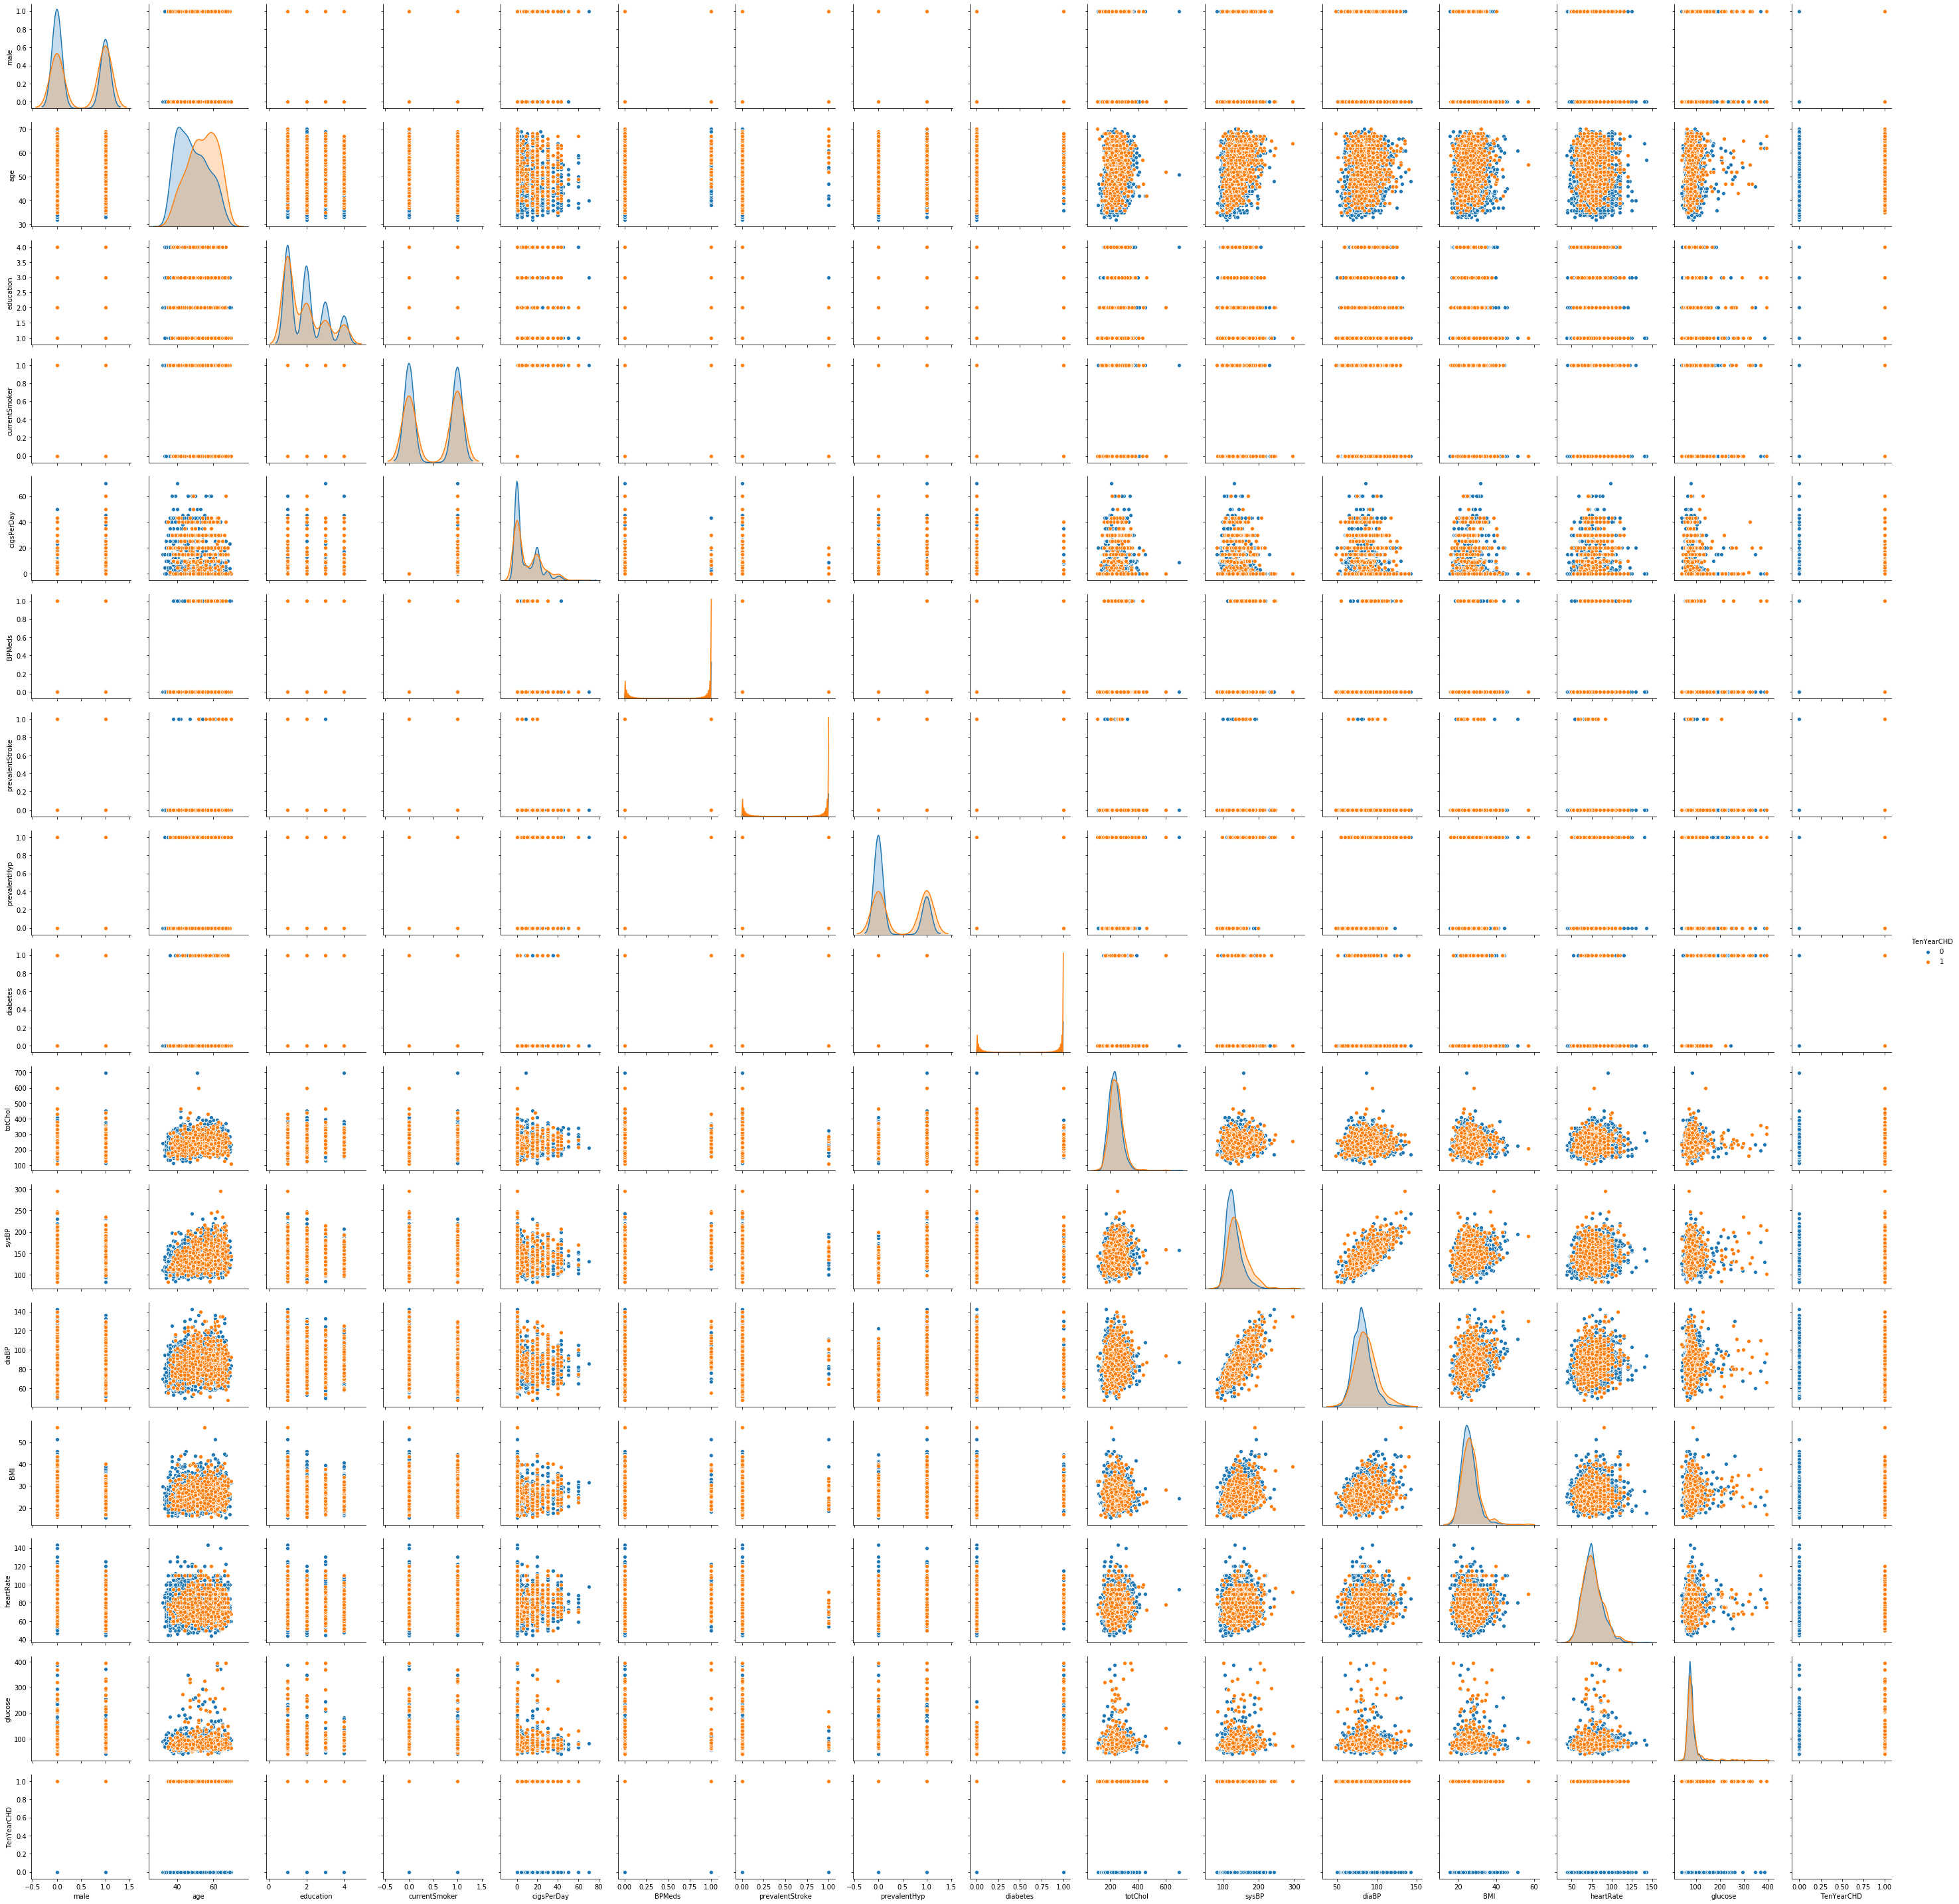

In [14]:
sns.pairplot(df,hue='TenYearCHD')
plt.show(
)

# Logistic Regression-Statistical approach

In [15]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X_constant=sm.add_constant(X)
model=sm.Logit(y,X_constant)
result=model.fit()
result.summary()

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.378283
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.1119
Time:                        16:55:29   Log-Likelihood:                -1603.9
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 8.365e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1393      0.663    -12.271      0.000      -9.439      -6.839
male                0.5046      0.100      5.033      0.000       0.308       0.701
age                 0.0621      0.006      9.987      0.000       0.050       0.074
education          -0.0093      0.046     -0.205      0.838      -0.099       0.080
currentSmoker       0.0079      0.144      0.055      0.956      -0.274       0.290
cigsPerDay          0.0215      0.006      3.780      0.000       0.010       0.033
BPMeds              0.2262      0.220      1.029      0.303      -0.204       0.657
prevalentStroke     0.9704      0.442      2.197      0.028       0.105       1.836
prevalentHyp        0.2329      0.129      1.813      0.070      -0.019       0.485
diabetes            0.1831      0.288      0.635      0.526      -0.382       0.748
totChol             0.0019      0.001      1.877      0.060   -8.43e-05       0.004
sysBP               0.0143      0.004      4.033      0.000       0.007       0.021
diaBP              -0.0031      0.006     -0.515      0.607      -0.015       0.009
BMI                 0.0027      0.012      0.230      0.818      -0.020       0.026
heartRate          -0.0016      0.004     -0.412      0.680      -0.009       0.006
glucose             0.0068      0.002      3.341      0.001       0.003       0.011
===================================================================================
"""

In [ ]:
H0:coefficient is zero->coefficient is normally distributed with mean=0->independant variable is not significant
H1:coefficient is not zero->independant variable is significant.

In [ ]:
''' for education,coefficient is -0.0136 and itsprobability is 0.757. i.e. there is 75.7 % chance of coefficient>
abs|0.0136|, when null hypo is true. Hence we fail to reject null hypo

In [18]:
vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif},index=X_constant.columns)

,vif
const,197.193600
male,1.191618
age,1.371773
education,1.054482
currentSmoker,2.500558
cigsPerDay,2.618422
BPMeds,1.101457
prevalentStroke,1.018843
prevalentHyp,2.053124
diabetes,1.525778


In [19]:
# Removing insignificant variables as per probabilities obtained from model summary
df=df.drop(['education','currentSmoker','BPMeds','diabetes','diaBP','BMI','heartRate'],axis=1)

In [20]:
#Build model again
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [21]:
X_constant=sm.add_constant(X)
model=sm.Logit(y,X_constant)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378531
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4231
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.1114
Time:                        16:55:49   Log-Likelihood:                -1605.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.125e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4628      0.482    -17.551      0.000      -9.408      -7.518
male                0.5008      0.098      5.099      0.000       0.308       0.693
age                 0.0633      0.006     10.576      0.000       0.052       0.075
cigsPerDay          0.0214      0.004      5.570      0.000       0.014       0.029
prevalentStroke     1.0221      0.438      2.331      0.020       0.163       1.881
prevalentHyp        0.2340      0.126      1.863      0.062      -0.012       0.480
totChol             0.0019      0.001      1.886      0.059   -7.48e-05       0.004
sysBP               0.0134      0.003      5.037      0.000       0.008       0.019
glucose             0.0077      0.002      4.824      0.000       0.005       0.011
===================================================================================
"""

In [ ]:
# We can see that now two variables :1)prevalentHyp 2)totChol are insignificant. Hence we drop them and build model again

In [22]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
df=df.sample(frac=1,random_state=3)

In [24]:
df=df.fillna(method='ffill')
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
#drop prevalentHyp and totChol
df=df.drop(['education','currentSmoker','BPMeds','diabetes','diaBP','BMI','heartRate','prevalentHyp','totChol'],axis=1)

In [26]:
#Build model again
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [27]:
X_constant=sm.add_constant(X)
model=sm.Logit(y,X_constant)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.379603
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.1088
Time:                        16:56:15   Log-Likelihood:                -1609.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 8.206e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4485      0.389    -21.734      0.000      -9.210      -7.687
male                0.4823      0.097      4.958      0.000       0.292       0.673
age                 0.0647      0.006     10.925      0.000       0.053       0.076
cigsPerDay          0.0214      0.004      5.587      0.000       0.014       0.029
prevalentStroke     1.0478      0.436      2.402      0.016       0.193       1.903
sysBP               0.0171      0.002      8.534      0.000       0.013       0.021
glucose             0.0074      0.002      4.609      0.000       0.004       0.011
===================================================================================
"""

In [ ]:
'''Interpretation of coefficient of age:
1)since sign of coefficient is positive, as age increases probability of CHD increases
2)with unit increase in age, log(odds) of CHD increases by 0.0646
3)with unit increase in age, odds(CHD) increase by 6%

In [ ]:
'''Interpretation of coefficient of male:
1)since sign of coefficient is positive,males have greater probability of CHD
2)log(odds) of CHD for male is higher by 0.4902 compared to females
3)odds(CHD) for male is 62% higher compared to females.

In [28]:
#Predict the values
prob=result.predict(X_constant)
prob

3546    0.069456
1127    0.038797
3088    0.417965
437     0.191569
3188    0.326516
          ...   
789     0.337248
968     0.117013
1667    0.161618
3321    0.189814
1688    0.045889
Length: 4240, dtype: float64

In [29]:
prob=pd.DataFrame(prob,columns=['prob'])
prob

,prob
3546,0.069456
1127,0.038797
3088,0.417965
437,0.191569
3188,0.326516
...,...
789,0.337248
968,0.117013
1667,0.161618
3321,0.189814


In [30]:
prob['y_est']=prob['prob'].apply(lambda x: 1 if x>0.5 else 0)
prob

,prob,y_est
3546,0.069456,0
1127,0.038797,0
3088,0.417965,0
437,0.191569,0
3188,0.326516,0
...,...,...
789,0.337248,0
968,0.117013,0
1667,0.161618,0
3321,0.189814,0


In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
print(confusion_matrix(y,prob['y_est']))

[[3570   26]
 [ 591   53]]


In [33]:
accuracy_score(y,prob['y_est'])

0.8544811320754717

In [34]:
print(classification_report(y,prob['y_est']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3596
           1       0.67      0.08      0.15       644

    accuracy                           0.85      4240
   macro avg       0.76      0.54      0.53      4240
weighted avg       0.83      0.85      0.80      4240



In [35]:
prob['y']=y
prob

,prob,y_est,y
3546,0.069456,0,0
1127,0.038797,0,0
3088,0.417965,0,0
437,0.191569,0,0
3188,0.326516,0,0
...,...,...,...
789,0.337248,0,0
968,0.117013,0,0
1667,0.161618,0,0
3321,0.189814,0,0


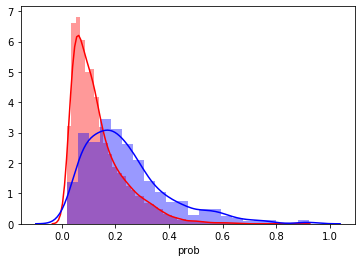

In [36]:
sns.distplot(prob['prob'][prob['y']==0],color='r')
sns.distplot(prob['prob'][prob['y']==1],color='b')
plt.show()

Inferences from above curve:
Blue Curve->Distribution of probabilities of 1s
                     ->Towards Right of cutoff line, under the blue curve->TP
                      ->Towards left hand side of cutoff line, under the blue curve->FN
Red Curve-> Distribution of probabilities of 1s
                     ->Towards Left Hand side of cut off line, under red curve->TN
                     ->Towards right hand side of cut off line, under the red curve->FP
If we shift the cut off line to 0.3, There will be no FN as no area under blue curve falls towards left of cut off line.
However, Number of FP increase significantly as significant area of red curve towards right side of the red curve.


# Logistical Regression using ML approach:

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
df=df.sample(frac=1,random_state=3)

In [40]:
df=df.fillna(method='ffill')

In [41]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print(X_train.shape,X_test.shape)

(2968, 15) (1272, 15)


In [45]:
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)[:,1]
print(y_train_pred)  #predicts probabilities and internally applies cut off of 0.5 and converts preditions into binaries.
print(y_train_prob)   #predicted probabilities.

[0 0 0 ... 0 1 0]
[0.09381002 0.05688989 0.13518496 ... 0.26962125 0.74418371 0.04530415]


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [47]:
print('Accuracy of Train:',accuracy_score(y_train,y_train_pred))
print('Confusion matrix of train: ','\n',confusion_matrix(y_train,y_train_pred))

Accuracy of Train: 0.8608490566037735
Confusion matrix of train:  
 [[2520   13]
 [ 400   35]]


In [48]:
y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

In [49]:
print('Accuracy of Test:',accuracy_score(y_test,y_test_pred))
print('Confusion matrix of Test: ','\n',confusion_matrix(y_test,y_test_pred))

Accuracy of Test: 0.8404088050314465
Confusion matrix of Test:  
 [[1060    3]
 [ 200    9]]


In [50]:
print('AUC on Train:',roc_auc_score(y_train,y_train_prob))

AUC on Train: 0.7313212718551896


In [51]:
print('AUC on Test:',roc_auc_score(y_test,y_test_prob))

AUC on Test: 0.699491823718194


In [52]:
fpr,tpr,threshold=roc_curve(y_train,y_train_prob)

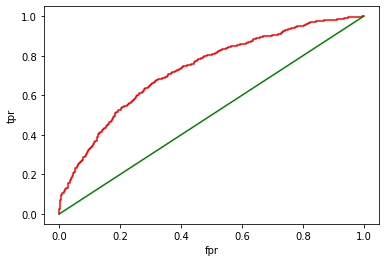

In [53]:
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'g')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

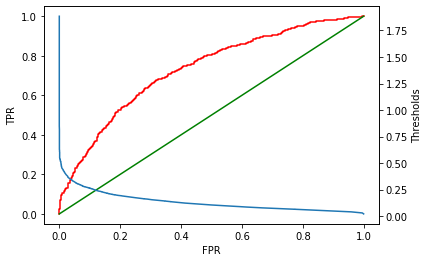

In [54]:
fig,ax=plt.subplots()
ax.plot(fpr,tpr,'r')
ax.plot(fpr,fpr,'g')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.plot(fpr,threshold)
ax1.set_ylabel('Thresholds')
plt.show()

In [55]:
roc=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':threshold})
roc.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.884038
1,0.000000,0.002299,0.884038
2,0.000000,0.004598,0.847325
3,0.000395,0.004598,0.816975
4,0.000395,0.022989,0.627935


In [56]:
roc.tail()

,FPR,TPR,Threshold
655,0.958942,0.995402,0.040029
656,0.958942,0.997701,0.039961
657,0.995657,0.997701,0.029994
658,0.995657,1.000000,0.029678
659,1.000000,1.000000,0.020559


# Decision Tree Classifier

In [2]:
import pandas as pd
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df=df.sample(frac=1,random_state=3)

In [4]:
df=df.fillna(method='ffill')

In [5]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier(random_state=3,max_depth=3,min_samples_split=50,min_samples_leaf=25)
tree.fit(X,y)

In [ ]:
import os  
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz" 

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz 
import pydotplus

features = X.columns
# Create DOT data
dot_data = export_graphviz(tree, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
! pip list

# Decision Tree for Prediction

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_train_pred=dt.predict(X_train)
y_train_prob=dt.predict_proba(X_train)[:,1]

print('Accuracy of Train Data:',accuracy_score(y_train,y_train_pred))
print('AUC score of train data:',roc_auc_score(y_train,y_train_prob))

y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)[:,1]
print('\n')
print('Accuracy of Test Data:',accuracy_score(y_test,y_test_pred))
print('AUC score of test data:',roc_auc_score(y_test,y_test_prob))

Accuracy of Train Data: 1.0
AUC score of train data: 1.0


Accuracy of Test Data: 0.7468553459119497
AUC score of test data: 0.5429474224344749


In [ ]:
# Conclusion: The above model using DT without any hyperparameters tuning is very much overfitted.

## Hyperparameter tuning in DT

### Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV

In [10]:
DT=DecisionTreeClassifier(random_state=3)
params={'max_depth': [2,4,6,8,10,12],
        'min_samples_split': [2,4,6,8,10,12],
        'min_samples_leaf': [1,2,4,6,8,10,12]}

gsearch=GridSearchCV(DT,param_grid=params,cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)

gsearch.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6, 8, 10, 12], 'min_samples_split': [2, 4, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [11]:
#Best combination of hyperparameters found by GridSearch
gsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [14]:
# The summary of the internal processing of the Gridsearch algorithm
gs=pd.DataFrame(gsearch.cv_results_)
gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.088672,0.084248,0.085802,0.019231,2,1,2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.668305,0.652346,0.659805,0.660152,0.006521,103,0.675406,0.685834,0.679464,0.680235,0.004292
1,0.014995,0.003925,0.048529,0.033390,2,1,4,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.668305,0.652346,0.659805,0.660152,0.006521,103,0.675406,0.685834,0.679464,0.680235,0.004292
2,0.014815,0.005245,0.008685,0.001909,2,1,6,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.668305,0.652346,0.659805,0.660152,0.006521,103,0.675406,0.685834,0.679464,0.680235,0.004292
3,0.040646,0.017461,0.005440,0.002423,2,1,8,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.668305,0.652346,0.659805,0.660152,0.006521,103,0.675406,0.685834,0.679464,0.680235,0.004292
4,0.028761,0.008282,0.009118,0.007121,2,1,10,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.668305,0.652346,0.659805,0.660152,0.006521,103,0.675406,0.685834,0.679464,0.680235,0.004292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.036860,0.006522,0.005965,0.001616,12,12,4,"{'max_depth': 12, 'min_samples_leaf': 12, 'min...",0.595494,0.631681,0.620029,0.615733,0.015085,193,0.896945,0.880039,0.890255,0.889080,0.006952
248,0.025092,0.002569,0.012966,0.007756,12,12,6,"{'max_depth': 12, 'min_samples_leaf': 12, 'min...",0.595494,0.631681,0.620029,0.615733,0.015085,193,0.896945,0.880039,0.890255,0.889080,0.006952
249,0.031055,0.003932,0.006322,0.001961,12,12,8,"{'max_depth': 12, 'min_samples_leaf': 12, 'min...",0.595494,0.631681,0.620029,0.615733,0.015085,193,0.896945,0.880039,0.890255,0.889080,0.006952
250,0.034950,0.008236,0.002107,0.002307,12,12,10,"{'max_depth': 12, 'min_samples_leaf': 12, 'min...",0.595494,0.631681,0.620029,0.615733,0.015085,193,0.896945,0.880039,0.890255,0.889080,0.006952


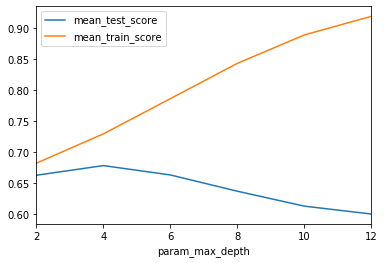

In [25]:
# From the above summary, we see how performence of training and testing datasets varies with values of max_depth hyperparameter
import matplotlib.pyplot as plt
%matplotlib inline
gs.groupby('param_max_depth')['mean_test_score','mean_train_score'].agg('mean').plot()

## Now use the best hyperparameters obtained from GridSearch to build model based on DT classifier.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

dt=DecisionTreeClassifier(**gsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred=dt.predict(X_train)
y_train_prob=dt.predict_proba(X_train)[:,1]

print('Accuracy of Train Data:',accuracy_score(y_train,y_train_pred))
print('AUC score of train data:',roc_auc_score(y_train,y_train_prob))

y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)[:,1]
print('\n')
print('Accuracy of Test Data:',accuracy_score(y_test,y_test_pred))
print('AUC score of test data:',roc_auc_score(y_test,y_test_prob))

Accuracy of Train Data: 0.8598382749326146
AUC score of train data: 0.728448843087339


Accuracy of Test Data: 0.8333333333333334
AUC score of test data: 0.6707364280023587


## Random Search Method

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [23]:
#implementing Random search with defined values of hyperparameters.
dt=DecisionTreeClassifier()
params={'max_depth':sp_randint(2,12),
        'min_samples_split':sp_randint(2,12),
        'min_samples_leaf':sp_randint(1,2)}

rsearch=RandomizedSearchCV(dt,param_distributions=params,n_iter=200,cv=3,
    scoring='roc_auc',random_state=3,return_train_score=True,
    n_jobs=-1)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E4A5FE6B88>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E4A6047BC8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E4A604CB08>},
          pre_dispatch='2*n_jobs', random_state=3, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [24]:
#Finding the best hyperparameters found using Random Search
rsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [27]:
# Summary of internal implementation of Random Search
rs=pd.DataFrame(rsearch.cv_results_)
rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.153752,0.001694,0.022544,0.001410,10,1,11,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.626324,0.650003,0.607941,0.628099,0.017216,146,0.857297,0.880684,0.859281,0.865754,0.010588
1,0.061113,0.058242,0.013832,0.013219,5,1,10,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.702155,0.645117,0.677334,0.674868,0.023356,30,0.733314,0.751806,0.739061,0.741394,0.007728
2,0.043549,0.011116,0.011636,0.008033,10,1,2,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.598681,0.639682,0.587420,0.608604,0.022459,186,0.869864,0.898171,0.877193,0.881743,0.011996
3,0.025928,0.004309,0.004656,0.000470,7,1,5,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.649427,0.645594,0.654286,0.649767,0.003556,109,0.784731,0.805181,0.788717,0.792877,0.008852
4,0.033575,0.003762,0.004655,0.000471,11,1,11,"{'max_depth': 11, 'min_samples_leaf': 1, 'min_...",0.598539,0.639036,0.583898,0.607169,0.023321,187,0.884864,0.900925,0.889048,0.891612,0.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.030916,0.002821,0.004655,0.000470,10,1,2,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.612283,0.637981,0.589122,0.613140,0.019953,180,0.869864,0.897945,0.879861,0.882556,0.011622
196,0.027260,0.011056,0.005652,0.000940,6,1,10,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",0.682119,0.650389,0.681939,0.671477,0.014917,45,0.764157,0.773874,0.761387,0.766473,0.005354
197,0.036236,0.014159,0.004322,0.001244,10,1,8,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.613940,0.644151,0.602613,0.620243,0.017532,166,0.860270,0.885284,0.865767,0.870440,0.010734
198,0.024600,0.006582,0.004655,0.000470,6,1,5,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",0.682187,0.648802,0.681488,0.670821,0.015577,72,0.764168,0.773874,0.764319,0.767454,0.004540


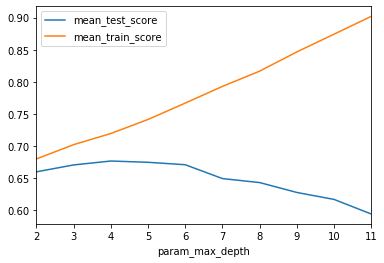

In [30]:
rs.groupby('param_max_depth')['mean_test_score','mean_train_score'].agg('mean').plot()
plt.show()

In [ ]:
#Conclusion:we can see that using Random Search, on testing data, best performance in terms of AUC score is obtained at depth=4

## Now use the best hyperparameters obtained from GridSearch to build model based on DT classifier.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

dt=DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred=dt.predict(X_train)
y_train_prob=dt.predict_proba(X_train)[:,1]

print('Accuracy of Train Data:',accuracy_score(y_train,y_train_pred))
print('AUC score of train data:',roc_auc_score(y_train,y_train_prob))

y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)[:,1]
print('\n')
print('Accuracy of Test Data:',accuracy_score(y_test,y_test_pred))
print('AUC score of test data:',roc_auc_score(y_test,y_test_prob))

Accuracy of Train Data: 0.8611859838274932
AUC score of train data: 0.7232344546242473


Accuracy of Test Data: 0.8301886792452831
AUC score of test data: 0.6744768574990885
